In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
LGR_df = pd.read_csv("../../data/salmon_data/results_ave_mae_1.csv", index_col=0)
LGR_df.sort_values(by="ave_MAE")

,Gene,ave_MAE
27,hba,0.959975
71,LOC106566372,0.961112
104,LOC106607380,0.962966
57,LOC106601072,0.968201
191,LOC123724067,0.970908
...,...,...
102,LOC106584291,1.021155
185,LOC106599773,1.021198
51,LOC106603571,1.021236
387,Random_16,1.022094


In [3]:
lgr_df_list = []
set_top_10 = set()
set_all_genes = set()
aggregate_df = pd.DataFrame()
for i in range(10):
    lgr_df = pd.read_csv(f"../../data/salmon_data/results_ave_mae_{i+1}.csv", index_col=0)
    lgr_df_list.append(lgr_df)
    top_10_df = set(lgr_df.sort_values(by="ave_MAE")["Gene"].head(10).values)
    set_top_10 = set_top_10.union(top_10_df)
    set_all_genes = set_all_genes.union(lgr_df["Gene"].values)
    aggregate_df = pd.concat([aggregate_df, lgr_df])
    #break

In [4]:
mean_df = aggregate_df.groupby("Gene").mean()
mean_df.rename(columns={"ave_MAE": "mean"}, inplace=True)
mean_df

,mean
Gene,
1433b,1.028213
143g1,1.005780
LOC100136378,1.016677
LOC100136415,1.011990
LOC100136434,1.019543
...,...
zgc:103559,1.023593
zgc:194655,1.032702
zgc:92242,1.035089


In [5]:
std_df = aggregate_df.groupby("Gene").std()
std_df.rename(columns={"ave_MAE": "std"}, inplace=True)
std_df

,std
Gene,
1433b,0.015658
143g1,0.007567
LOC100136378,NaN
LOC100136415,0.007336
LOC100136434,NaN
...,...
zgc:103559,0.010096
zgc:194655,0.012785
zgc:92242,0.010829


In [6]:
count_df = aggregate_df.groupby("Gene").count()
count_df.rename(columns={"ave_MAE": "count"}, inplace=True)
count_df

,count
Gene,
1433b,2
143g1,5
LOC100136378,1
LOC100136415,4
LOC100136434,1
...,...
zgc:103559,9
zgc:194655,6
zgc:92242,4


In [7]:
LGR_agg_df = pd.concat([mean_df, std_df, count_df], axis=1)
LGR_agg_df

,mean,std,count
Gene,,,
1433b,1.028213,0.015658,2
143g1,1.005780,0.007567,5
LOC100136378,1.016677,NaN,1
LOC100136415,1.011990,0.007336,4
LOC100136434,1.019543,NaN,1
...,...,...,...
zgc:103559,1.023593,0.010096,9
zgc:194655,1.032702,0.012785,6
zgc:92242,1.035089,0.010829,4


In [8]:
len(set_all_genes)

1432

In [9]:
len(set_top_10)

17

In [10]:
# aggregate accross runs

In [11]:
top_10_df

{'LOC106566372',
 'LOC106578021',
 'LOC106583594',
 'LOC106601072',
 'LOC106602771',
 'LOC106603702',
 'LOC106607380',
 'duox',
 'hba',
 'otub1'}

In [12]:
lgr_df_list[1]

,Gene,ave_MAE
0,LOC106578255,1.039442
1,LOC106609978,1.024372
2,LOC106601563,1.032764
3,LOC106596522,1.020894
4,LOC106590035,1.044069
...,...,...
764,Random_15,1.055095
765,Random_16,1.050612
766,Random_17,1.055571
767,Random_18,1.054867


In [13]:
GFGWA_df = pd.read_csv("../../data/GFGWA_genes_minpval.csv", index_col=0)
# GFGWA_df["minpval"] = GFGWA_df[['pval_AltGreater', 'pval_AltLess']].min(axis=1)
GFGWA_df

,minpval
143b2,0.048587
2a5e,0.000469
4f2,0.012341
5nt1a,0.060738
5ntc,0.009990
...,...
zpr1,0.000167
zranb2,0.000016
zswim7,0.000152
zswim8,0.011779


In [14]:
# Add percentiles
LGR_df["LGR_pct"] = LGR_df["ave_MAE"].rank(pct=True, ascending=False)
LGR_df.sort_values(by="LGR_pct", ascending=False, inplace=True)
LGR_df
LGR_agg_df["LGR_pct"] = LGR_agg_df["mean"].rank(pct=True, ascending=False)
LGR_agg_df.sort_values(by="LGR_pct", ascending=False, inplace=True)
LGR_agg_df.head(10)

,mean,std,count,LGR_pct
Gene,,,,
LOC106566372,0.970102,0.006391,10,1.000000
hba,0.971321,0.008957,10,0.999302
LOC106607380,0.974992,0.010902,10,0.998603
duox,0.978879,0.006727,10,0.997905
LOC106601072,0.982234,0.010190,10,0.997207
LOC106578021,0.983076,0.005382,10,0.996508
LOC106583594,0.984803,0.006695,10,0.995810
LOC106602771,0.985106,0.006386,10,0.995112
LOC106576057,0.985859,0.009726,6,0.994413


In [15]:
# LGR_agg_df.head(10).to_csv("top10.csv")

In [16]:
GFGWA_df["GFGWA_pct"] = GFGWA_df["minpval"].rank(pct=True, ascending=False)
GFGWA_df.sort_values(by="GFGWA_pct", ascending=False, inplace=True)
GFGWA_df

,minpval,GFGWA_pct
LOC106590443,4.960956e-14,1.000000
utrn,7.269689e-14,0.999959
hsd17b10,9.798417e-14,0.999918
LOC106571044,1.834140e-13,0.999877
gfra4b,2.892599e-13,0.999836
...,...,...
txndc17,4.980976e-01,0.000185
tirap,4.980976e-01,0.000185
rhno1,4.981365e-01,0.000123
LOC100286437,4.994315e-01,0.000082


In [17]:
combined_df = pd.merge(left=GFGWA_df, left_on=GFGWA_df.index, right=LGR_df, right_on=LGR_df["Gene"])
#combined_df = pd.merge(left=GFGWA_df, left_on=GFGWA_df.index, right=LGR_agg_df, right_on=LGR_agg_df.index)
combined_df

,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct
0,pnp4b,4.589157e-10,0.979369,pnp4b,1.018978,0.048593
1,LOC106589940,5.048503e-10,0.978959,LOC106589940,0.991797,0.884910
2,myo9ab,7.537091e-10,0.975637,myo9ab,1.008827,0.496164
3,LOC106565572,9.272353e-10,0.973812,LOC106565572,1.008553,0.511509
4,LOC106565341,9.337759e-10,0.973709,LOC106565341,1.002764,0.693095
...,...,...,...,...,...,...
169,fzd8a,4.086577e-01,0.005496,fzd8a,0.987576,0.930946
170,LOC106577994,4.088536e-01,0.005455,LOC106577994,1.010255,0.437340
171,LOC106582964,4.469041e-01,0.002953,LOC106582964,1.011123,0.381074
172,LOC106563358,4.575629e-01,0.002420,LOC106563358,1.001791,0.710997


In [18]:
combined_df["mean_PCT_score"] = (combined_df["GFGWA_pct"] + combined_df["LGR_pct"])/2

In [19]:
combined_df["pct_product"] = combined_df["GFGWA_pct"] * combined_df["LGR_pct"]

In [20]:
combined_df_display = combined_df#.drop('key_0', axis=1)
combined_df_display.rename(columns={'minpval': 'GFGWA_pval'})
combined_df_display.sort_values(by="mean_PCT_score", ascending=False).head(10)


,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,pct_product
9,si:ch211-106h4.4,1.672437e-08,0.942086,si:ch211-106h4.4,0.985567,0.936061,0.939074,0.881850
1,LOC106589940,5.048503e-10,0.978959,LOC106589940,0.991797,0.884910,0.931935,0.866291
21,LOC106602771,1.238417e-06,0.833969,LOC106602771,0.979385,0.966752,0.900360,0.806241
13,LOC106581305,9.252821e-08,0.910996,LOC106581305,0.995344,0.836317,0.873657,0.761882
32,LOC106575107,5.766602e-06,0.773430,LOC106575107,0.984489,0.946292,0.859861,0.731890
6,LOC100196779,5.400605e-09,0.957467,LOC100196779,0.999756,0.754476,0.855971,0.722385
19,LOC106564502,8.933971e-07,0.845700,LOC106564502,0.993793,0.861893,0.853796,0.728902
4,LOC106565341,9.337759e-10,0.973709,LOC106565341,1.002764,0.693095,0.833402,0.674873
30,LOC106588296,4.814967e-06,0.780608,LOC106588296,0.992685,0.877238,0.828923,0.684779
10,rgcc,2.377099e-08,0.936590,rgcc,1.001582,0.716113,0.826351,0.670704


In [21]:
combined_df_display["LGR_rank"] = combined_df_display["LGR_pct"].rank(ascending=False)
combined_df_display["GFGWA_rank"] = combined_df_display["GFGWA_pct"].rank(ascending=False)
top=combined_df_display[combined_df_display["LGR_rank"] <= 20]
top[["key_0", "LGR_rank", "GFGWA_rank"]].sort_values(by="GFGWA_rank").head(5)

,key_0,LGR_rank,GFGWA_rank
9,si:ch211-106h4.4,10.0,10.0
21,LOC106602771,5.0,22.0
32,LOC106575107,7.0,33.0
41,LOC106571461,19.0,42.0
53,gfpt1,8.0,54.0


In [22]:
combined_df_display["LGR_rank"] = combined_df_display["LGR_pct"].rank(ascending=False)
combined_df_display["GFGWA_rank"] = combined_df_display["GFGWA_pct"].rank(ascending=False)
top = combined_df_display[combined_df_display["GFGWA_rank"] <= 20]
top[["key_0", "LGR_rank", "GFGWA_rank"]].sort_values(by="LGR_rank").head(5)

,key_0,LGR_rank,GFGWA_rank
9,si:ch211-106h4.4,10.0,10.0
1,LOC106589940,21.0,2.0
19,LOC106564502,30.0,20.0
13,LOC106581305,34.0,14.0
6,LOC100196779,51.0,7.0


In [23]:
gfgwa_weight = 0.5
lgr_weight = 1-gfgwa_weight
# combined_df_display["weighted_pct_product"] = (gfgwa_weight * combined_df_display["GFGWA_pct"]) * (lgr_weight * combined_df_display["LGR_pct"])
combined_df_display["weighted_pct_mean"] = (gfgwa_weight * combined_df_display["GFGWA_pct"]) + (lgr_weight * combined_df_display["LGR_pct"])/2
combined_df_display["weighted_pct_mean_rank"] = combined_df_display["weighted_pct_mean"].rank(ascending=False)
combined_df_display["mean_pct_rank"] = combined_df_display["mean_PCT_score"].rank(ascending=False)
combined_df_display["product_pct_rank"] = combined_df_display["pct_product"].rank(ascending=False)
combined_df_display["weighted_mean_pct_rank"] = combined_df_display["weighted_pct_mean"].rank(ascending=False)
combined_df_display.sort_values(by="pct_product", ascending=False, inplace=True)
combined_df_display[["key_0","mean_PCT_score", "product_pct_rank", "mean_pct_rank", "weighted_mean_pct_rank", "GFGWA_pct", "LGR_pct", "mean_PCT_score", "weighted_pct_mean"]].head(5)#.to_csv("top20.csv")

,key_0,mean_PCT_score,product_pct_rank,mean_pct_rank,weighted_mean_pct_rank,GFGWA_pct,LGR_pct,mean_PCT_score,weighted_pct_mean
9,si:ch211-106h4.4,0.939074,1.0,1.0,2.0,0.942086,0.936061,0.939074,0.705058
1,LOC106589940,0.931935,2.0,2.0,1.0,0.978959,0.884910,0.931935,0.710707
21,LOC106602771,0.900360,3.0,3.0,6.0,0.833969,0.966752,0.900360,0.658673
13,LOC106581305,0.873657,4.0,4.0,4.0,0.910996,0.836317,0.873657,0.664577
32,LOC106575107,0.859861,5.0,5.0,11.0,0.773430,0.946292,0.859861,0.623288


In [24]:
len(set(combined_df_display.head(10)["weighted_mean_pct_rank"].values).intersection(set({1,2,3,4,5,6,7,8,9,10})))

8

In [25]:
np.linspace(0,1,100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [26]:
weighted_top10_in_mean_top10 = []

for gfgwa_weight in np.linspace(0,1,1000):

    #gfgwa_weight = 0.5
    lgr_weight = 1-gfgwa_weight
    combined_df_display["weighted_pct_mean"] =((gfgwa_weight * combined_df_display["GFGWA_pct"]) + (lgr_weight * combined_df_display["LGR_pct"]))/2
    combined_df_display["mean_PCT_score"] = ((combined_df_display["GFGWA_pct"]) + (combined_df_display["LGR_pct"]))/2
    combined_df_display["mean_pct_rank"] = combined_df_display["mean_PCT_score"].rank(ascending=False)
    combined_df_display["weighted_mean_pct_rank"] = combined_df_display["weighted_pct_mean"].rank(ascending=False)
    combined_df_display.sort_values(by="mean_PCT_score", ascending=False, inplace=True)
    combined_df_display[["key_0","mean_PCT_score", "product_pct_rank", "mean_pct_rank", "weighted_mean_pct_rank", "GFGWA_pct", "LGR_pct", "mean_PCT_score", "pct_product"]].head(10)
    number_in_both = len(set(combined_df_display.head(10)["weighted_mean_pct_rank"].values).intersection(set({1,2,3,4,5,6,7,8,9,10})))
    weighted_top10_in_mean_top10.append(number_in_both)
    #break


In [27]:
combined_df_display[["key_0","mean_PCT_score", "mean_pct_rank", "weighted_mean_pct_rank", "weighted_pct_mean", "GFGWA_pct", "LGR_pct",]].head(20)

,key_0,mean_PCT_score,mean_pct_rank,weighted_mean_pct_rank,weighted_pct_mean,GFGWA_pct,LGR_pct
9,si:ch211-106h4.4,0.939074,1.0,10.0,0.471043,0.942086,0.936061
1,LOC106589940,0.931935,2.0,2.0,0.489480,0.978959,0.884910
21,LOC106602771,0.900360,3.0,22.0,0.416985,0.833969,0.966752
13,LOC106581305,0.873657,4.0,14.0,0.455498,0.910996,0.836317
32,LOC106575107,0.859861,5.0,33.0,0.386715,0.773430,0.946292
6,LOC100196779,0.855971,6.0,7.0,0.478733,0.957467,0.754476
19,LOC106564502,0.853796,7.0,20.0,0.422850,0.845700,0.861893
4,LOC106565341,0.833402,8.0,5.0,0.486855,0.973709,0.693095
30,LOC106588296,0.828923,9.0,31.0,0.390304,0.780608,0.877238
10,rgcc,0.826351,10.0,11.0,0.468295,0.936590,0.716113


In [28]:
?plt.bar

Signature:
plt.bar(
    x: 'float | ArrayLike',
    height: 'float | ArrayLike',
    width: 'float | ArrayLike' = 0.8,
    bottom: 'float | ArrayLike | None' = None,
    *,
    align: "Literal['center', 'edge']" = 'center',
    data=None,
    **kwargs,
) -> 'BarContainer'
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

    Note that if *bottom* has units (e.g. datetime), *height* should be in
    units that are a difference from the value of *bottom* (e.g. timedelta).

width : float or array-like, default: 0.8
    The width(s) 

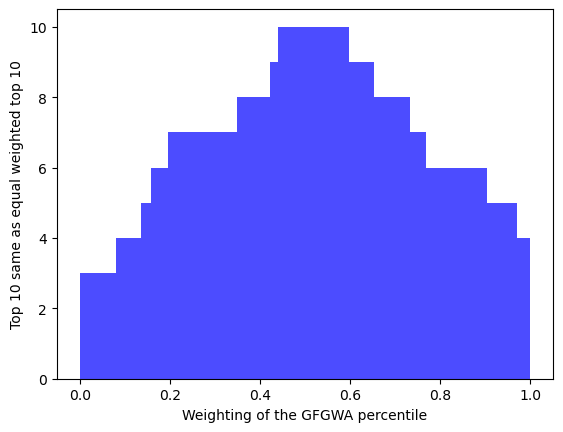

In [29]:
plt.bar(x = np.linspace(0,1,1000), 
        height = weighted_top10_in_mean_top10, 
        width=0.001,
        fc="b",
        alpha=0.7)
plt.ylabel("Top 10 same as equal weighted top 10")
plt.xlabel("Weighting of the GFGWA percentile")
plt.savefig("../../figures/weight_changing.png")
# plt.title("Using mean")

In [30]:
weighted_top10_in_product_top10 = []

for epsilon in  np.linspace(-1,1,1000):

    #gfgwa_weight = 0.5
    #lgr_weight = 1-gfgwa_weight
    # combined_df_display["weighted_pct_product"] = (gfgwa_weight * combined_df_display["GFGWA_pct"]) * (lgr_weight * combined_df_display["LGR_pct"])
    combined_df_display["weighted_pct_product"] = (combined_df_display["GFGWA_pct"]**(1+epsilon)) * (combined_df_display["LGR_pct"]**(1-epsilon))
    # combined_df_display["weighted_pct_mean_rank"] = combined_df_display["weighted_pct_mean"].rank(ascending=False)
    # combined_df_display["mean_pct_rank"] = combined_df_display["mean_PCT_score"].rank(ascending=False)
    combined_df_display["product_pct_rank"] = combined_df_display["pct_product"].rank(ascending=False)
    # combined_df_display["weighted_mean_pct_rank"] = combined_df_display["weighted_pct_mean"].rank(ascending=False)
    combined_df_display["weighted_product_pct_rank"] = combined_df_display["weighted_pct_product"].rank(ascending=False)
    combined_df_display.sort_values(by="pct_product", ascending=False, inplace=True)
    combined_df_display[["key_0","mean_PCT_score", "product_pct_rank", "mean_pct_rank", "weighted_mean_pct_rank", "GFGWA_pct", "LGR_pct", "mean_PCT_score", "pct_product"]].head(10)
    number_in_both = len(set(combined_df_display.head(10)["weighted_product_pct_rank"].values).intersection(set({1,2,3,4,5,6,7,8,9,10})))
    weighted_top10_in_product_top10.append(number_in_both)

In [31]:
combined_df_display[["key_0","mean_PCT_score", "product_pct_rank", "mean_pct_rank", "weighted_product_pct_rank", "GFGWA_pct", "LGR_pct", "mean_PCT_score", "pct_product"]].head(10)

,key_0,mean_PCT_score,product_pct_rank,mean_pct_rank,weighted_product_pct_rank,GFGWA_pct,LGR_pct,mean_PCT_score,pct_product
9,si:ch211-106h4.4,0.939074,1.0,1.0,10.0,0.942086,0.936061,0.939074,0.881850
1,LOC106589940,0.931935,2.0,2.0,2.0,0.978959,0.884910,0.931935,0.866291
21,LOC106602771,0.900360,3.0,3.0,22.0,0.833969,0.966752,0.900360,0.806241
13,LOC106581305,0.873657,4.0,4.0,14.0,0.910996,0.836317,0.873657,0.761882
32,LOC106575107,0.859861,5.0,5.0,33.0,0.773430,0.946292,0.859861,0.731890
19,LOC106564502,0.853796,6.0,7.0,20.0,0.845700,0.861893,0.853796,0.728902
6,LOC100196779,0.855971,7.0,6.0,7.0,0.957467,0.754476,0.855971,0.722385
30,LOC106588296,0.828923,8.0,9.0,31.0,0.780608,0.877238,0.828923,0.684779
4,LOC106565341,0.833402,9.0,8.0,5.0,0.973709,0.693095,0.833402,0.674873
10,rgcc,0.826351,10.0,10.0,11.0,0.936590,0.716113,0.826351,0.670704


Text(0.5, 1.0, 'Using product')

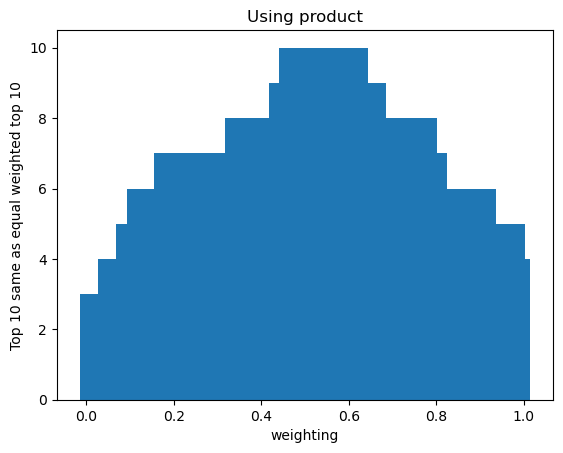

In [32]:
plt.bar(x = np.linspace(0,1,1000), height = weighted_top10_in_product_top10, width=0.03)
plt.ylabel("Top 10 same as equal weighted top 10")
plt.xlabel("weighting")
plt.title("Using product")

In [33]:
print("Using mean: mean, std", np.mean(weighted_top10_in_mean_top10), np.round(np.std(weighted_top10_in_mean_top10),3))
print("Using product: mean, std", np.mean(weighted_top10_in_product_top10), np.round(np.std(weighted_top10_in_product_top10),3))

Using mean: mean, std 6.837 2.105
Using product: mean, std 7.184 1.923


In [34]:
combined_df_display[["key_0","mean_PCT_score", "weighted_product_pct_rank", "mean_pct_rank", "weighted_mean_pct_rank", "GFGWA_pct", "LGR_pct", "mean_PCT_score", "pct_product"]].head(10)

,key_0,mean_PCT_score,weighted_product_pct_rank,mean_pct_rank,weighted_mean_pct_rank,GFGWA_pct,LGR_pct,mean_PCT_score,pct_product
9,si:ch211-106h4.4,0.939074,10.0,1.0,10.0,0.942086,0.936061,0.939074,0.881850
1,LOC106589940,0.931935,2.0,2.0,2.0,0.978959,0.884910,0.931935,0.866291
21,LOC106602771,0.900360,22.0,3.0,22.0,0.833969,0.966752,0.900360,0.806241
13,LOC106581305,0.873657,14.0,4.0,14.0,0.910996,0.836317,0.873657,0.761882
32,LOC106575107,0.859861,33.0,5.0,33.0,0.773430,0.946292,0.859861,0.731890
19,LOC106564502,0.853796,20.0,7.0,20.0,0.845700,0.861893,0.853796,0.728902
6,LOC100196779,0.855971,7.0,6.0,7.0,0.957467,0.754476,0.855971,0.722385
30,LOC106588296,0.828923,31.0,9.0,31.0,0.780608,0.877238,0.828923,0.684779
4,LOC106565341,0.833402,5.0,8.0,5.0,0.973709,0.693095,0.833402,0.674873
10,rgcc,0.826351,11.0,10.0,11.0,0.936590,0.716113,0.826351,0.670704


In [35]:
combined_df["logminpval"] = -np.log10(combined_df["minpval"] )
combined_df

,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,pct_product,LGR_rank,GFGWA_rank,weighted_pct_mean,weighted_pct_mean_rank,mean_pct_rank,product_pct_rank,weighted_mean_pct_rank,weighted_pct_product,weighted_product_pct_rank,logminpval
9,si:ch211-106h4.4,1.672437e-08,0.942086,si:ch211-106h4.4,0.985567,0.936061,0.939074,0.881850,10.0,10.0,0.471043,2.0,1.0,1.0,10.0,0.887526,10.0,7.776650
1,LOC106589940,5.048503e-10,0.978959,LOC106589940,0.991797,0.884910,0.931935,0.866291,21.0,2.0,0.489480,1.0,2.0,2.0,2.0,0.958361,2.0,9.296837
21,LOC106602771,1.238417e-06,0.833969,LOC106602771,0.979385,0.966752,0.900360,0.806241,5.0,22.0,0.416985,6.0,3.0,3.0,22.0,0.695504,22.0,5.907133
13,LOC106581305,9.252821e-08,0.910996,LOC106581305,0.995344,0.836317,0.873657,0.761882,34.0,14.0,0.455498,4.0,4.0,4.0,14.0,0.829914,14.0,7.033726
32,LOC106575107,5.766602e-06,0.773430,LOC106575107,0.984489,0.946292,0.859861,0.731890,7.0,33.0,0.386715,11.0,5.0,5.0,33.0,0.598194,33.0,5.239080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,LOC106571490,1.426141e-01,0.050408,LOC106571490,1.017712,0.079284,0.064846,0.003997,165.0,158.0,0.025204,174.0,174.0,170.0,158.0,0.002541,158.0,0.845837
170,LOC106577994,4.088536e-01,0.005455,LOC106577994,1.010255,0.437340,0.221398,0.002386,112.0,171.0,0.002728,169.0,163.0,171.0,171.0,0.000030,171.0,0.388432
172,LOC106563358,4.575629e-01,0.002420,LOC106563358,1.001791,0.710997,0.356709,0.001721,58.0,173.0,0.001210,155.0,133.0,172.0,173.0,0.000006,173.0,0.339549
171,LOC106582964,4.469041e-01,0.002953,LOC106582964,1.011123,0.381074,0.192014,0.001125,123.0,172.0,0.001477,171.0,167.0,173.0,172.0,0.000009,172.0,0.349786


In [36]:
pvalthreshold = -np.log10(0.05 )
pvalthreshold

1.3010299956639813

In [37]:
priority = combined_df[combined_df["LGR_pct"] < 0.05]
priority = priority[priority["minpval"] < 0.05]
priority

,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,pct_product,LGR_rank,GFGWA_rank,weighted_pct_mean,weighted_pct_mean_rank,mean_pct_rank,product_pct_rank,weighted_mean_pct_rank,weighted_pct_product,weighted_product_pct_rank,logminpval
0,pnp4b,4.589157e-10,0.979369,pnp4b,1.018978,0.048593,0.513981,0.047591,170.0,1.0,0.489685,35.0,81.0,140.0,1.0,0.959164,1.0,9.338267
16,LOC106570315,6.981491e-07,0.854600,LOC106570315,1.018983,0.046036,0.450318,0.039342,171.0,17.0,0.427300,55.0,103.0,143.0,17.0,0.730341,17.0,6.156052
28,mmp13,3.299204e-06,0.796358,mmp13,1.020441,0.015345,0.405852,0.012220,172.0,29.0,0.398179,68.0,121.0,161.0,29.0,0.634186,29.0,5.481591
92,LOC106584291,1.339016e-03,0.419466,LOC106584291,1.021155,0.012788,0.216127,0.005364,173.0,93.0,0.209733,145.0,166.0,167.0,93.0,0.175952,93.0,2.873214
63,LOC106603571,2.251246e-04,0.561093,LOC106603571,1.021236,0.007673,0.284383,0.004305,174.0,64.0,0.280546,114.0,150.0,169.0,64.0,0.314825,64.0,3.647577


In [38]:
priority_list = list(priority["key_0"].unique())
priority_list

['pnp4b', 'LOC106570315', 'mmp13', 'LOC106584291', 'LOC106603571']

In [39]:
combined_df_without_priority = combined_df[~combined_df["key_0"].isin(priority_list)]
combined_df_without_priority

,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,pct_product,LGR_rank,GFGWA_rank,weighted_pct_mean,weighted_pct_mean_rank,mean_pct_rank,product_pct_rank,weighted_mean_pct_rank,weighted_pct_product,weighted_product_pct_rank,logminpval
9,si:ch211-106h4.4,1.672437e-08,0.942086,si:ch211-106h4.4,0.985567,0.936061,0.939074,0.881850,10.0,10.0,0.471043,2.0,1.0,1.0,10.0,0.887526,10.0,7.776650
1,LOC106589940,5.048503e-10,0.978959,LOC106589940,0.991797,0.884910,0.931935,0.866291,21.0,2.0,0.489480,1.0,2.0,2.0,2.0,0.958361,2.0,9.296837
21,LOC106602771,1.238417e-06,0.833969,LOC106602771,0.979385,0.966752,0.900360,0.806241,5.0,22.0,0.416985,6.0,3.0,3.0,22.0,0.695504,22.0,5.907133
13,LOC106581305,9.252821e-08,0.910996,LOC106581305,0.995344,0.836317,0.873657,0.761882,34.0,14.0,0.455498,4.0,4.0,4.0,14.0,0.829914,14.0,7.033726
32,LOC106575107,5.766602e-06,0.773430,LOC106575107,0.984489,0.946292,0.859861,0.731890,7.0,33.0,0.386715,11.0,5.0,5.0,33.0,0.598194,33.0,5.239080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,LOC106571490,1.426141e-01,0.050408,LOC106571490,1.017712,0.079284,0.064846,0.003997,165.0,158.0,0.025204,174.0,174.0,170.0,158.0,0.002541,158.0,0.845837
170,LOC106577994,4.088536e-01,0.005455,LOC106577994,1.010255,0.437340,0.221398,0.002386,112.0,171.0,0.002728,169.0,163.0,171.0,171.0,0.000030,171.0,0.388432
172,LOC106563358,4.575629e-01,0.002420,LOC106563358,1.001791,0.710997,0.356709,0.001721,58.0,173.0,0.001210,155.0,133.0,172.0,173.0,0.000006,173.0,0.339549
171,LOC106582964,4.469041e-01,0.002953,LOC106582964,1.011123,0.381074,0.192014,0.001125,123.0,172.0,0.001477,171.0,167.0,173.0,172.0,0.000009,172.0,0.349786


In [40]:
combined_priority_only = combined_df[combined_df["key_0"].isin(priority_list)]
combined_priority_only

,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,pct_product,LGR_rank,GFGWA_rank,weighted_pct_mean,weighted_pct_mean_rank,mean_pct_rank,product_pct_rank,weighted_mean_pct_rank,weighted_pct_product,weighted_product_pct_rank,logminpval
0,pnp4b,4.589157e-10,0.979369,pnp4b,1.018978,0.048593,0.513981,0.047591,170.0,1.0,0.489685,35.0,81.0,140.0,1.0,0.959164,1.0,9.338267
16,LOC106570315,6.981491e-07,0.854600,LOC106570315,1.018983,0.046036,0.450318,0.039342,171.0,17.0,0.427300,55.0,103.0,143.0,17.0,0.730341,17.0,6.156052
28,mmp13,3.299204e-06,0.796358,mmp13,1.020441,0.015345,0.405852,0.012220,172.0,29.0,0.398179,68.0,121.0,161.0,29.0,0.634186,29.0,5.481591
92,LOC106584291,1.339016e-03,0.419466,LOC106584291,1.021155,0.012788,0.216127,0.005364,173.0,93.0,0.209733,145.0,166.0,167.0,93.0,0.175952,93.0,2.873214
63,LOC106603571,2.251246e-04,0.561093,LOC106603571,1.021236,0.007673,0.284383,0.004305,174.0,64.0,0.280546,114.0,150.0,169.0,64.0,0.314825,64.0,3.647577


In [41]:
light_green = (0.0, 0.6, 0.5)
pink = (1, 0.078, 0.576)

In [42]:
combined_priority_only.iloc[0]["Gene"]

'pnp4b'

In [43]:
combined_priority_only.reset_index(drop=True, inplace=True)

In [44]:
combined_priority_only.reset_index(inplace=True) # create index column for plot

In [45]:
combined_priority_only

,index,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,pct_product,LGR_rank,GFGWA_rank,weighted_pct_mean,weighted_pct_mean_rank,mean_pct_rank,product_pct_rank,weighted_mean_pct_rank,weighted_pct_product,weighted_product_pct_rank,logminpval
0,0,pnp4b,4.589157e-10,0.979369,pnp4b,1.018978,0.048593,0.513981,0.047591,170.0,1.0,0.489685,35.0,81.0,140.0,1.0,0.959164,1.0,9.338267
1,1,LOC106570315,6.981491e-07,0.854600,LOC106570315,1.018983,0.046036,0.450318,0.039342,171.0,17.0,0.427300,55.0,103.0,143.0,17.0,0.730341,17.0,6.156052
2,2,mmp13,3.299204e-06,0.796358,mmp13,1.020441,0.015345,0.405852,0.012220,172.0,29.0,0.398179,68.0,121.0,161.0,29.0,0.634186,29.0,5.481591
3,3,LOC106584291,1.339016e-03,0.419466,LOC106584291,1.021155,0.012788,0.216127,0.005364,173.0,93.0,0.209733,145.0,166.0,167.0,93.0,0.175952,93.0,2.873214
4,4,LOC106603571,2.251246e-04,0.561093,LOC106603571,1.021236,0.007673,0.284383,0.004305,174.0,64.0,0.280546,114.0,150.0,169.0,64.0,0.314825,64.0,3.647577


In [46]:
combined_priority_only.iloc[5]

IndexError: single positional indexer is out-of-bounds

/tmp/ipykernel_2638315/2470764992.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = combined_priority_only["logminpval"],


Text(0, 0.5, 'LGR percentile')

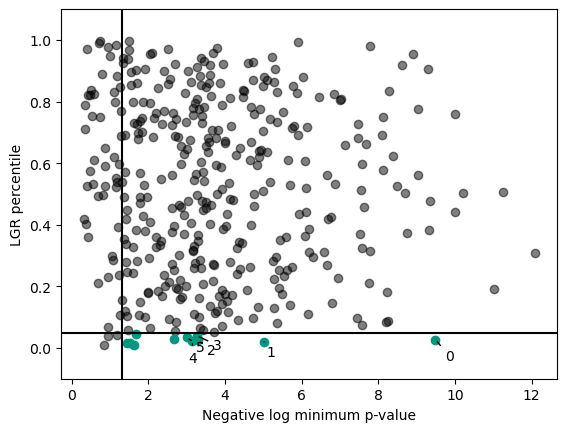

In [ ]:
plt.scatter(x = combined_df_without_priority["logminpval"], 
            y = combined_df_without_priority["LGR_pct"],
            c='k',
            alpha=0.5)
plt.scatter(x = combined_priority_only["logminpval"], 
            y = combined_priority_only["LGR_pct"],
            c=light_green,
            alpha=1)
plt.axvline(x=pvalthreshold, c='k')
plt.axhline(y=0.05, c='k')
plt.ylim(-.1, 1.1)
plt.annotate(combined_priority_only.iloc[0]["index"], 
             (combined_priority_only.iloc[0]["logminpval"], 
              combined_priority_only.iloc[0]["LGR_pct"]), 
              textcoords="offset points", xytext=(10,-15), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[1]["index"], 
             (combined_priority_only.iloc[1]["logminpval"], 
              combined_priority_only.iloc[1]["LGR_pct"]), 
              textcoords="offset points", xytext=(5,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[2]["index"], 
             (combined_priority_only.iloc[2]["logminpval"], 
              combined_priority_only.iloc[2]["LGR_pct"]), 
              textcoords="offset points", xytext=(10,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[3]["index"], 
             (combined_priority_only.iloc[3]["logminpval"], 
              combined_priority_only.iloc[3]["LGR_pct"]), 
              textcoords="offset points", xytext=(15,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[4]["index"], 
             (combined_priority_only.iloc[4]["logminpval"], 
              combined_priority_only.iloc[4]["LGR_pct"]), 
              textcoords="offset points", xytext=(0,-15), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[5]["index"], 
             (combined_priority_only.iloc[5]["logminpval"], 
              combined_priority_only.iloc[5]["LGR_pct"]), 
              textcoords="offset points", xytext=(10,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.xlabel("Negative log minimum p-value")
plt.ylabel("LGR percentile")